In [4]:
import pandas as pd
import pickle
import time, os

from bs4 import BeautifulSoup
import requests

import re

import random

print('Libraries imported')

all_page_list = []

all_items_list = []


Libraries imported


In [5]:
with open('all_item_list.pkl', 'rb') as input:
    all_items_list = pickle.load(input)

In [6]:
#This header is to bypass CAPCHA
header = {
    "User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.125 Safari/537.36",
    "Accept-Language": "en-GB,en-US;q=0.9,en;q=0.8"
}

#Dataframe headers
df_headers = ["Name", "Description", "Category", "Country", "Alcohol_Vol", "Review", "Style",
             "Aroma", "Flavor", "Sweetness", "Bitterness", "Enjoy", "Pairing", "Cocktails", 
             "Bottom_Line", "Points", "Price"]

root_url = 'https://www.tastings.com'

### Get all page_links

In [4]:

#Lastest review
page_url = 'https://www.tastings.com/Reviews/Latest-Spirits-Wine-Beer-Reviews.aspx'

response = requests.get(page_url, headers=header)

data = response.text

soup = BeautifulSoup(data, "html.parser")
for i in range(len(soup.find_all(class_='m-content-link-bold m-content-link-font-q'))):
    
    url = soup.find_all(class_='m-content-link-bold m-content-link-font-q')[i]['href']
    all_page_list.append(root_url+url)

print('Now we have {} links'.format(len(all_page_list)))

Now we have 95 links


In [5]:
#2020 Review

page_url = 'https://www.tastings.com/Reviews/2020-Spirits-Wine-Beer-Reviews.aspx'

response = requests.get(page_url, headers=header)

data = response.text

soup = BeautifulSoup(data, "html.parser")

for i in range(len(soup.find_all(class_='m-content-link-bold m-content-link-font-q'))):
    
    url = soup.find_all(class_='m-content-link-bold m-content-link-font-q')[i]['href']
    all_page_list.append(root_url+url)
    
print('Now we have {} links'.format(len(all_page_list)))

Now we have 192 links


In [6]:
#2019 Review

page_url = 'https://www.tastings.com/Reviews/2019-Spirits-Wine-Beer-Reviews.aspx'

response = requests.get(page_url, headers=header)

data = response.text

soup = BeautifulSoup(data, "html.parser")

for i in range(len(soup.find_all(class_='m-content-link-bold m-content-link-font-q'))):
    
    url = soup.find_all(class_='m-content-link-bold m-content-link-font-q')[i]['href']
    all_page_list.append(root_url+url)
    
print('Now we have {} links'.format(len(all_page_list)))

Now we have 292 links


In [7]:
#2018 Review

page_url = 'https://www.tastings.com/Reviews/2018-Spirits-Wine-Beer-Reviews.aspx'

response = requests.get(page_url, headers=header)

data = response.text

soup = BeautifulSoup(data, "html.parser")

for i in range(len(soup.find_all(class_='m-content-link-bold m-content-link-font-q'))):
    
    url = soup.find_all(class_='m-content-link-bold m-content-link-font-q')[i]['href']
    all_page_list.append(root_url+url)
    
print('Now we have {} links'.format(len(all_page_list)))

Now we have 390 links


### Get all items_links

In [8]:
page_url = 'https://www.tastings.com/Calendar-Spirits/Review-2021-05-01-Agave.aspx'

response = requests.get(page_url, headers=header)

data = response.text

soup = BeautifulSoup(data, "html.parser")


In [9]:
soup.find_all(class_='m-preview-title-1')[0].find('a')['href']

'/Spirits-Review/Mezcal-de-Leyendas-Verde-San-Luis-Potosi-Mezcal-Mexico-90-Proof-05-01-2021.aspx'

In [10]:
# #Get all items_links
# all_items_list = []

# for url in all_page_list:
    
#     response = requests.get(url, headers=header)

#     data = response.text

#     soup = BeautifulSoup(data, "html.parser")

#     for i in range(len(soup.find_all(class_='m-preview-title-1'))):
    
#         item_url = soup.find_all(class_='m-preview-title-1')[i].find('a')['href']
        
#         all_items_list.append(root_url+item_url)

    
# print('Now we have {} items to scrape!'.format(len(all_items_list)))

In [11]:
all_items_list[:10]

['https://www.tastings.com/Spirits-Review/Mezcal-de-Leyendas-Verde-San-Luis-Potosi-Mezcal-Mexico-90-Proof-05-01-2021.aspx',
 'https://www.tastings.com/Spirits-Review/El-Tesoro-Paradiso-Tequila-Extra-Anejo-Mexico-05-01-2021.aspx',
 'https://www.tastings.com/Spirits-Review/Peloton-de-la-Muerte-Vegan-Pechuga-Mezcal-Mexico-90-2-Proof-05-01-2021.aspx',
 'https://www.tastings.com/Spirits-Review/El-Tesoro-Anejo-Tequila-Mexico-05-01-2021.aspx',
 'https://www.tastings.com/Spirits-Review/1800-Milenio-Extra-Anejo-Tequila-Mexico-05-01-2021.aspx',
 'https://www.tastings.com/Spirits-Review/El-Tesoro-Blanco-Tequila-Mexico-05-01-2021.aspx',
 'https://www.tastings.com/Spirits-Review/Mezcal-de-Leyendas-Cenizo-Durango-Mezcal-Mexico-94-Proof-05-01-2021.aspx',
 'https://www.tastings.com/Spirits-Review/El-Tesoro-Extra-Anejo-Tequila-Mexico-05-01-2021.aspx',
 'https://www.tastings.com/Spirits-Review/Jose-Cuervo-Reserva-De-La-Familia-Extra-Anejo-Tequila-Mexico-05-01-2021.aspx',
 'https://www.tastings.com/Spiri

### Get all items_details

In [75]:
items_list = []

page_url = 'https://www.tastings.com/Wine-Review/Celebrities-2018-Syrah-Carinena-Spain-11-08-2020.aspx'

response = requests.get(page_url, headers=header)

data = response.text

soup = BeautifulSoup(data, "html.parser")


In [13]:
soup.find_all('meta')[2]['content'] #name

'Celebrities 2018 Syrah Carinena Spain Wine Review | Tastings'

In [14]:
soup.find_all('meta')[4]['content'] #description

'Celebrities Review Syrah 2018 Spain Spanish Wine Cariñena Syrah 233202 Red Wine Tasting Note Flavor Description Fruity Juicy & Smooth & Rich & Full Smooth Dryish Moderate Oak Interesting blackberry reduction sassafras dried figs and dates and black olives Same as aromas with notes of hints of roasted meats A bold chewy Syrah that will stand up to rich beefy dishes Silver Medal November 2020 Rating $10.99 88 Points Moderate Price Affordable Economical Gregory Vine Best Buy Best Buy Good Value'

In [27]:
soup.find_all(class_='m-review-center-info-text')[0].find('h3').text.split('\r\n')[1].strip() #categories

'Syrah'

In [35]:
soup.find_all(class_='m-review-center-info-text')[0].find_all('div')[1].text.strip().split('\r\n')[1].strip() #country

'Spain'

In [36]:
soup.find_all(class_='m-review-center-info-text')[0].find_all('div')[2].text.strip().split('\r\n')[1].strip() #alcohol vol

'14.5%'

In [41]:
soup.find(class_='m-review-testimonials-text').text.strip() #review_text

'Black garnet color. Fruity aromas and flavors of blackberry reduction, sassafras, dried figs and dates, and black olives with a slightly chewy, vibrant, dryish medium-full body and a silky, appealing, medium-long finish displaying notes of hints of roasted meats with moderate oak flavor. A bold, chewy Syrah that will stand up to rich, beefy dishes.'

In [56]:
soup.find(id='ctl00_ContentMain_rowStyle').find(class_='m-review-tastings-notes-cell-value').text.strip() #Style

'Fruity, Juicy & Smooth & Rich & Full'

In [57]:
soup.find(id='ctl00_ContentMain_rowAroma').find(class_='m-review-tastings-notes-cell-value').text.strip() #Aroma

'blackberry reduction, sassafras, dried figs and dates, and black olives'

In [58]:
soup.find(id='ctl00_ContentMain_rowFlavor').find(class_='m-review-tastings-notes-cell-value').text.strip() #Flavor

'Same as aromas with notes of hints of roasted meats'

In [60]:
soup.find(id='ctl00_ContentMain_rowSweetness').find(class_='m-review-tastings-notes-cell-value').text.strip() #Sweetness

'Dryish'

In [73]:
soup.find(id='ctl00_ContentMain_rowBitterness').find(class_='m-review-tastings-notes-cell-value').text.strip() #Bitterness

AttributeError: 'NoneType' object has no attribute 'find'

In [62]:
soup.find(id='ctl00_ContentMain_rowEnjoy').find(class_='m-review-tastings-notes-cell-value').text.strip() #Enjoy

'Now on its own and with food'

In [63]:
soup.find(id='ctl00_ContentMain_rowPairing').find(class_='m-review-tastings-notes-cell-value').text.strip() #Pairing

'Peking Duck, Lamb Tagine, Souvlaki'

In [72]:
soup.find(id='ctl00_ContentMain_rowCocktails').find(class_='m-review-tastings-notes-cell-value').text.strip() #Cocktails

AttributeError: 'NoneType' object has no attribute 'find'

In [65]:
soup.find(id='ctl00_ContentMain_rowBottomLine').find(class_='m-review-tastings-notes-cell-value').text.strip() #Bottom Line

'A bold, chewy Syrah that will stand up to rich, beefy dishes.'

In [68]:
soup.find(class_='m-review-medal-points-q').text.strip() #points

'88 Points'

In [69]:
soup.find(id='ctl00_ContentMain_divPrice').text.strip() #Price

'$10.99'

### Scrape

In [76]:
import numpy as np

In [90]:
def get_drink_features(url):
    
    features_list = []
    
    response = requests.get(url, headers=header)

    data = response.text

    soup = BeautifulSoup(data, "html.parser")
    
    
    try:
        name = soup.find_all('meta')[2]['content']
    except:
        name = np.nan
    
    
    try:
        description = soup.find_all('meta')[4]['content']
    except:
        description = np.nan
    
    try:
        category = soup.find_all(class_='m-review-center-info-text')[0].find('h3').text.split('\r\n')[1].strip()
    except:
        category = np.nan
        
    try:
        country = soup.find_all(class_='m-review-center-info-text')[0].find_all('div')[1].text.strip().split('\r\n')[1].strip()
    except:
        country = np.nan
    
    try:
        alc_vol = soup.find_all(class_='m-review-center-info-text')[0].find_all('div')[2].text.strip().split('\r\n')[1].strip()
    except:
        alc_vol = np.nan
        
        
    try:
        review = soup.find(class_='m-review-testimonials-text').text.strip()
    except:
        review = np.nan
        
    try:
        style = soup.find(id='ctl00_ContentMain_rowStyle').find(class_='m-review-tastings-notes-cell-value').text.strip()
    except:
        style = np.nan
        
    try:
        aroma = soup.find(id='ctl00_ContentMain_rowAroma').find(class_='m-review-tastings-notes-cell-value').text.strip()
    except:
        aroma = np.nan
        
    try:
        flavor = soup.find(id='ctl00_ContentMain_rowFlavor').find(class_='m-review-tastings-notes-cell-value').text.strip()
    except:
        flavor = np.nan
        
    try:
        sweetness = soup.find(id='ctl00_ContentMain_rowSweetness').find(class_='m-review-tastings-notes-cell-value').text.strip()
    except:
        sweetness = np.nan
        
    try:
        bitterness = soup.find(id='ctl00_ContentMain_rowBitterness').find(class_='m-review-tastings-notes-cell-value').text.strip()
    except:
        bitterness = np.nan
        
    try:
        enjoy = soup.find(id='ctl00_ContentMain_rowEnjoy').find(class_='m-review-tastings-notes-cell-value').text.strip()
    except:
        enjoy = np.nan
        
    try:
        pairing = soup.find(id='ctl00_ContentMain_rowPairing').find(class_='m-review-tastings-notes-cell-value').text.strip()
    except:
        pairing = np.nan
        
    try:
        cocktails = soup.find(id='ctl00_ContentMain_rowCocktails').find(class_='m-review-tastings-notes-cell-value').text.strip()
    except:
        cocktails = np.nan
        
    try:
        bot_line = soup.find(id='ctl00_ContentMain_rowBottomLine').find(class_='m-review-tastings-notes-cell-value').text.strip()
    except:
        bot_line = np.nan
        
    try:
        point = soup.find(class_='m-review-medal-points-q').text.strip()
    except:
        point = np.nan
        
    try:
        price = soup.find(id='ctl00_ContentMain_divPrice').text.strip()
    except:
        price = np.nan
        
        
    #Put all features in a dictionary
    drink_dict = dict(zip(df_headers, [name,
                                      description,
                                      category,
                                      country,
                                      alc_vol,
                                      review,
                                      style,
                                      aroma,
                                      flavor,
                                      sweetness,
                                      bitterness,
                                      enjoy,
                                      pairing,
                                      cocktails,
                                      bot_line,
                                      point,
                                      price]))
    
    features_list = features_list.append(drink_dict)
    
    return features_list
    

In [92]:
features_list = []

get_drink_features('https://www.tastings.com/Wine-Review/Celebrities-2018-Syrah-Carinena-Spain-11-08-2020.aspx')

features_list

[]

In [121]:
len(all_items_list[7000:])

3522

In [122]:
#Scrape 1000 items

features_list = []

for url in all_items_list[7000:]:

    response = requests.get(url, headers=header)

    data = response.text

    soup = BeautifulSoup(data, "html.parser")


    try:
        name = soup.find_all('meta')[2]['content']
    except:
        name = np.nan


    try:
        description = soup.find_all('meta')[4]['content']
    except:
        description = np.nan

    try:
        category = soup.find_all(class_='m-review-center-info-text')[0].find('h3').text.split('\r\n')[1].strip()
    except:
        category = np.nan

    try:
        country = soup.find_all(class_='m-review-center-info-text')[0].find_all('div')[1].text.strip().split('\r\n')[1].strip()
    except:
        country = np.nan

    try:
        alc_vol = soup.find_all(class_='m-review-center-info-text')[0].find_all('div')[2].text.strip().split('\r\n')[1].strip()
    except:
        alc_vol = np.nan


    try:
        review = soup.find(class_='m-review-testimonials-text').text.strip()
    except:
        review = np.nan

    try:
        style = soup.find(id='ctl00_ContentMain_rowStyle').find(class_='m-review-tastings-notes-cell-value').text.strip()
    except:
        style = np.nan

    try:
        aroma = soup.find(id='ctl00_ContentMain_rowAroma').find(class_='m-review-tastings-notes-cell-value').text.strip()
    except:
        aroma = np.nan

    try:
        flavor = soup.find(id='ctl00_ContentMain_rowFlavor').find(class_='m-review-tastings-notes-cell-value').text.strip()
    except:
        flavor = np.nan

    try:
        sweetness = soup.find(id='ctl00_ContentMain_rowSweetness').find(class_='m-review-tastings-notes-cell-value').text.strip()
    except:
        sweetness = np.nan

    try:
        bitterness = soup.find(id='ctl00_ContentMain_rowBitterness').find(class_='m-review-tastings-notes-cell-value').text.strip()
    except:
        bitterness = np.nan

    try:
        enjoy = soup.find(id='ctl00_ContentMain_rowEnjoy').find(class_='m-review-tastings-notes-cell-value').text.strip()
    except:
        enjoy = np.nan

    try:
        pairing = soup.find(id='ctl00_ContentMain_rowPairing').find(class_='m-review-tastings-notes-cell-value').text.strip()
    except:
        pairing = np.nan

    try:
        cocktails = soup.find(id='ctl00_ContentMain_rowCocktails').find(class_='m-review-tastings-notes-cell-value').text.strip()
    except:
        cocktails = np.nan

    try:
        bot_line = soup.find(id='ctl00_ContentMain_rowBottomLine').find(class_='m-review-tastings-notes-cell-value').text.strip()
    except:
        bot_line = np.nan

    try:
        point = soup.find(class_='m-review-medal-points-q').text.strip()
    except:
        point = np.nan

    try:
        price = soup.find(id='ctl00_ContentMain_divPrice').text.strip()
    except:
        price = np.nan


    #Put all features in a dictionary
    drink_dict = dict(zip(df_headers, [name,
                                      description,
                                      category,
                                      country,
                                      alc_vol,
                                      review,
                                      style,
                                      aroma,
                                      flavor,
                                      sweetness,
                                      bitterness,
                                      enjoy,
                                      pairing,
                                      cocktails,
                                      bot_line,
                                      point,
                                      price]))

    features_list.append(drink_dict)

df = pd.DataFrame(features_list)

df.to_csv('data/df_1000items_p8_p10.csv')

print('Done!')

Done!


In [123]:
response = requests.get('https://www.tastings.com/Beer-Review/Vancouver-Island-Brewing-Pipers-Pale-Ale-Canada-08-02-2018.aspx', headers=header)

data = response.text

soup = BeautifulSoup(data, "html.parser")

In [130]:
root_url + soup.find(class_='m-review-catg-desc-image-container').find('img')['src'] #photo 127 x 228

'https://www.tastings.com/images-BTI/Glasses/Beer-Glasses/Beer-Glass-Nonic-Pint-Amber.jpg'

In [135]:
soup.find(class_='m-review-catg-desc-text').text.strip() #extend review

'English-style pale ales are pale gold to amber in color and range in alcohol from 4-6%. These beers are characterized by the flavors and aromas of nutty and biscuity English malts, floral and earthy English hops and the notes of fruitiness and faint butterscotch of English yeast. Water also plays a key role in the overall character of these beers. Great examples of this style are brewed with harder water resembling that of Burton-Upon-Trent, lending these beers an impression of dryness in the finish and rounded hop bitterness. Pale ales originated in England over 300 years ago with the advent of new technology making pale barely malt a possibility. In the 19th century, ales that were pale in color were often referred to as pale ale or bitter interchangeably. Today, there is a distinction between these styles, albeit a very fine distinction with some arguing that “bitter” refers to the style dispensed as draft and “pale ale” to the style when bottled. Noteworthy examples of this style 

In [17]:
len(all_items_list)

10522

In [8]:
response = requests.get('https://www.tastings.com/Spirits-Review/Mezcal-de-Leyendas-Verde-San-Luis-Potosi-Mezcal-Mexico-90-Proof-05-01-2021.aspx', headers=header)

data = response.text

soup = BeautifulSoup(data, "html.parser")

In [15]:
soup.find(id='ctl00_ContentMain_divBands').text.strip()

'Superlative'

In [18]:
import time, os

In [30]:
#Scrape more reviews and photos
smaller_headers = ["Name", "Extend_Review", "Photo_Link", "Medal", "Bands"]
features_list = []

for url in all_items_list[9000:]:

    response = requests.get(url, headers=header)

    data = response.text

    soup = BeautifulSoup(data, "html.parser")


    try:
        name = soup.find_all('meta')[2]['content']
    except:
        name = np.nan

    try:
        extend_review = soup.find(class_='m-review-catg-desc-text').text.strip()
    except:
        extend_review = np.nan

    try:
        photo_link = root_url + soup.find(class_='m-review-catg-desc-image-container').find('img')['src'] #photo 127 x 228
    except:
        photo_link = np.nan
    
    try:
        medal = soup.find(id='ctl00_ContentMain_divMedal').text.strip()
    except:
        medal = np.nan
    
    try:
        bands = soup.find(id='ctl00_ContentMain_divBands').text.strip()
    except:
        bands = np.nan


    #Put all features in a dictionary
    drink_dict = dict(zip(smaller_headers, [name,
                                      extend_review,
                                      photo_link,
                                           medal,
                                           bands]))

    features_list.append(drink_dict)

df = pd.DataFrame(features_list)

df.to_csv('tastings_review_medal_photos_10.csv')
time.sleep(60)
print('Done!')

Done!


In [145]:
len(all_items_list)

10522

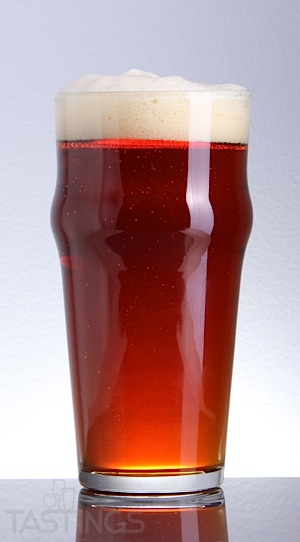

In [31]:
# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
Image('https://www.tastings.com/images-BTI/Glasses/Beer-Glasses/Beer-Glass-Nonic-Pint-Amber.jpg', width=127, height=228)